# <font color='blue'>Data Science Academy</font>
# <font color='blue'>Business Analytics</font>

# <font color='blue'>Capítulo 11 - Fraud Analytics</font>
## <font color='blue'>Mini-Projeto 3</font>
### <font color='blue'>Data Quality Report e Detecção de Fraudes em Transações Imobiliárias</font>

## Etapa 1 - Data Quality Report (DQR)

O DQR é um relatório analítico com o objetivo de compreender a organização dos dados, se estão coerentes, se há alguma anomalia amplamente visível e resumir os dados (ou pelo menos as variáveis mais importantes) com base na compreensão do problema de negócio.

A descrição do que representa cada variável está disponível no Dicionário de Dados e no material complementar no link abaixo:

https://www1.nyc.gov/site/finance/taxes/definitions-of-property-assessment-terms.page

![title](imagens/mini-projeto3.png)

In [1]:
# Versão da Linguagem Python
from platform import python_version
print('Versão da Linguagem Python Usada Neste Jupyter Notebook:', python_version())

Versão da Linguagem Python Usada Neste Jupyter Notebook: 3.8.11


## Instalando e Carregando os Pacotes

In [2]:
# Para atualizar um pacote, execute o comando abaixo no terminal ou prompt de comando:
# pip install -U nome_pacote

# Para instalar a versão exata de um pacote, execute o comando abaixo no terminal ou prompt de comando:
# !pip install nome_pacote==versão_desejada

# Depois de instalar ou atualizar o pacote, reinicie o jupyter notebook.

# Instala o pacote watermark. 
# Esse pacote é usado para gravar as versões de outros pacotes usados neste jupyter notebook.
!pip install -q -U watermark

In [3]:
# Imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.pyplot as pyplot
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
pd.set_option('display.float_format', lambda x : '%.2f' % x)
%matplotlib inline

In [4]:
# Versões dos pacotes usados neste jupyter notebook
%reload_ext watermark
%watermark -a "Data Science Academy" --iversions

Author: Data Science Academy

numpy     : 1.20.3
matplotlib: 3.4.2
seaborn   : 0.11.2
pandas    : 1.3.2



## Resumo dos Dados

In [5]:
# Carrega os dados
dados = pd.read_csv('dados/dataset.csv', index_col = 0)

In [6]:
# Shape
dados.shape

(1070994, 31)

In [7]:
# Visualiza
dados.head()

,BBLE,B,BLOCK,LOT,EASEMENT,OWNER,BLDGCL,TAXCLASS,LTFRONT,LTDEPTH,...,BLDFRONT,BLDDEPTH,AVLAND2,AVTOT2,EXLAND2,EXTOT2,EXCD2,PERIOD,YEAR,VALTYPE
RECORD,,,,,,,,,,,,,,,,,,,,,
1,1000010101,1,1,101,NaN,U S GOVT LAND & BLDGS,P7,4,500,1046,...,0,0,3775500.00,8613000.00,3775500.00,8613000.00,NaN,FINAL,2010/11,AC-TR
2,1000010201,1,1,201,NaN,U S GOVT LAND & BLDGS,Z9,4,27,0,...,0,0,11111400.00,80690400.00,11111400.00,80690400.00,NaN,FINAL,2010/11,AC-TR
3,1000020001,1,2,1,NaN,DEPT OF GENERAL SERVI,Y7,4,709,564,...,709,564,32321790.00,40179510.00,32321790.00,40179510.00,NaN,FINAL,2010/11,AC-TR
4,1000020023,1,2,23,NaN,DEPARTMENT OF BUSINES,T2,4,793,551,...,85,551,13644000.00,15750000.00,13644000.00,15750000.00,NaN,FINAL,2010/11,AC-TR
5,1000030001,1,3,1,NaN,PARKS AND RECREATION,Q1,4,323,1260,...,89,57,106348680.00,107758350.00,106348680.00,107758350.00,NaN,FINAL,2010/11,AC-TR


In [8]:
# Resumo
print("Linhas: ", dados.shape[0])
print("Colunas: ", dados.shape[1])
print("\nVariáveis: \n", dados.columns.tolist())
print("\nValores Ausentes: \n" , dados.isnull().sum())
print("\nValores Únicos: \n", dados.nunique())

Linhas:  1070994
Colunas:  31

Variáveis: 
 ['BBLE', 'B', 'BLOCK', 'LOT', 'EASEMENT', 'OWNER', 'BLDGCL', 'TAXCLASS', 'LTFRONT', 'LTDEPTH', 'EXT', 'STORIES', 'FULLVAL', 'AVLAND', 'AVTOT', 'EXLAND', 'EXTOT', 'EXCD1', 'STADDR', 'ZIP', 'EXMPTCL', 'BLDFRONT', 'BLDDEPTH', 'AVLAND2', 'AVTOT2', 'EXLAND2', 'EXTOT2', 'EXCD2', 'PERIOD', 'YEAR', 'VALTYPE']

Valores Ausentes: 
 BBLE              0
B                 0
BLOCK             0
LOT               0
EASEMENT    1066358
OWNER         31745
BLDGCL            0
TAXCLASS          0
LTFRONT           0
LTDEPTH           0
EXT          716689
STORIES       56264
FULLVAL           0
AVLAND            0
AVTOT             0
EXLAND            0
EXTOT             0
EXCD1        432506
STADDR          676
ZIP           29890
EXMPTCL     1055415
BLDFRONT          0
BLDDEPTH          0
AVLAND2      788268
AVTOT2       788262
EXLAND2      983545
EXTOT2       940166
EXCD2        978046
PERIOD            0
YEAR              0
VALTYPE           0
dtype: int64

In [9]:
# Info
dados.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1070994 entries, 1 to 1070994
Data columns (total 31 columns):
 #   Column    Non-Null Count    Dtype  
---  ------    --------------    -----  
 0   BBLE      1070994 non-null  object 
 1   B         1070994 non-null  int64  
 2   BLOCK     1070994 non-null  int64  
 3   LOT       1070994 non-null  int64  
 4   EASEMENT  4636 non-null     object 
 5   OWNER     1039249 non-null  object 
 6   BLDGCL    1070994 non-null  object 
 7   TAXCLASS  1070994 non-null  object 
 8   LTFRONT   1070994 non-null  int64  
 9   LTDEPTH   1070994 non-null  int64  
 10  EXT       354305 non-null   object 
 11  STORIES   1014730 non-null  float64
 12  FULLVAL   1070994 non-null  float64
 13  AVLAND    1070994 non-null  float64
 14  AVTOT     1070994 non-null  float64
 15  EXLAND    1070994 non-null  float64
 16  EXTOT     1070994 non-null  float64
 17  EXCD1     638488 non-null   float64
 18  STADDR    1070318 non-null  object 
 19  ZIP       1041104 non

In [10]:
# Colunas numéricas (quantitativas)
num_cols = ['LTFRONT', 'LTDEPTH', 'STORIES', 'FULLVAL', 'AVLAND', 'AVTOT', 'EXLAND', 'EXTOT', 'BLDFRONT', 'BLDDEPTH', \
            'AVLAND2', 'AVTOT2', 'EXLAND2', 'EXTOT2']

In [11]:
# Colunas categóricas
cat_cols = ['BBLE', 'B', 'BLOCK', 'LOT', 'EASEMENT', 'OWNER', 'BLDGCL', 'TAXCLASS', 'EXT', 'EXCD1', 'STADDR', 'ZIP',\
            'EXMPTCL', 'EXCD2', 'PERIOD', 'YEAR', 'VALTYPE']

In [12]:
# Verifica se o total de variáveis está coberto nos objetos anteriores
len(num_cols) + len(cat_cols) == 31

True

In [13]:
# Dataframes com os tipos diferentes de variáveis
df_num = dados[num_cols]
df_cat = dados[cat_cols]

In [14]:
# Sumário estatístico das variáveis numéricas
summ_num = pd.DataFrame(index = df_num.columns)
summ_num['Tipo de Dado'] = df_num.dtypes.values
summ_num['# Registros Não Nulos'] = df_num.count().values
summ_num['# Registros Não Zero'] = df_num.astype(bool).sum(axis = 0)
summ_num['% Populado'] = round(summ_num['# Registros Não Nulos'] / df_num.shape[0]*100,2)
summ_num['# Valores Únicos'] = df_num.nunique().values
summ_num['Mean'] = round(df_num.mean(),2)
summ_num['Std'] = round(df_num.std(),2)
summ_num['Min'] = round(df_num.min(),2)
summ_num['Max'] = round(df_num.max(),2)
summ_num

,Tipo de Dado,# Registros Não Nulos,# Registros Não Zero,% Populado,# Valores Únicos,Mean,Std,Min,Max
LTFRONT,int64,1070994,901886,100.00,1297,36.64,74.03,0.00,9999.00
LTDEPTH,int64,1070994,900866,100.00,1370,88.86,76.40,0.00,9999.00
STORIES,float64,1014730,1070994,94.75,111,5.01,8.37,1.00,119.00
FULLVAL,float64,1070994,1057987,100.00,109324,874264.51,11582430.99,0.00,6150000000.00
AVLAND,float64,1070994,1057985,100.00,70921,85067.92,4057260.06,0.00,2668500000.00
AVTOT,float64,1070994,1057987,100.00,112914,227238.17,6877529.31,0.00,4668308947.00
EXLAND,float64,1070994,579295,100.00,33419,36423.89,3981575.79,0.00,2668500000.00
EXTOT,float64,1070994,638422,100.00,64255,91186.98,6508402.82,0.00,4668308947.00
BLDFRONT,int64,1070994,842179,100.00,612,23.04,35.58,0.00,7575.00
BLDDEPTH,int64,1070994,842141,100.00,621,39.92,42.71,0.00,9393.00


In [15]:
# Sumário estatístico das variáveis categóricas
summ_cat = pd.DataFrame(index = df_cat.columns)
summ_cat['Tipo de Dado'] = df_cat.dtypes.values
summ_cat['# Registros Não Nulos'] = df_cat.count().values
summ_cat['% Populado'] = round(summ_cat['# Registros Não Nulos'] / df_cat.shape[0]*100,2)
summ_cat['# Valores Únicos'] = df_cat.nunique().values

In [16]:
# Adiciona mais uma coluna com valores mais comuns
temp = []
for col in cat_cols:
    temp.append(df_cat[col].value_counts().idxmax())
summ_cat['Valores Mais Comuns'] = temp

In [17]:
summ_cat

,Tipo de Dado,# Registros Não Nulos,% Populado,# Valores Únicos,Valores Mais Comuns
BBLE,object,1070994,100.00,1070994,1000010101
B,int64,1070994,100.00,5,4
BLOCK,int64,1070994,100.00,13984,3944
LOT,int64,1070994,100.00,6366,1
EASEMENT,object,4636,0.43,12,E
OWNER,object,1039249,97.04,863346,PARKCHESTER PRESERVAT
BLDGCL,object,1070994,100.00,200,R4
TAXCLASS,object,1070994,100.00,11,1
EXT,object,354305,33.08,3,G
EXCD1,float64,638488,59.62,129,1017.00


## Identificação, Exploração e Visualização das Variáveis

In [18]:
# Variáveis
dados.columns

Index(['BBLE', 'B', 'BLOCK', 'LOT', 'EASEMENT', 'OWNER', 'BLDGCL', 'TAXCLASS',
       'LTFRONT', 'LTDEPTH', 'EXT', 'STORIES', 'FULLVAL', 'AVLAND', 'AVTOT',
       'EXLAND', 'EXTOT', 'EXCD1', 'STADDR', 'ZIP', 'EXMPTCL', 'BLDFRONT',
       'BLDDEPTH', 'AVLAND2', 'AVTOT2', 'EXLAND2', 'EXTOT2', 'EXCD2', 'PERIOD',
       'YEAR', 'VALTYPE'],
      dtype='object')

In [19]:
# Visualiza
dados.head()

,BBLE,B,BLOCK,LOT,EASEMENT,OWNER,BLDGCL,TAXCLASS,LTFRONT,LTDEPTH,...,BLDFRONT,BLDDEPTH,AVLAND2,AVTOT2,EXLAND2,EXTOT2,EXCD2,PERIOD,YEAR,VALTYPE
RECORD,,,,,,,,,,,,,,,,,,,,,
1,1000010101,1,1,101,NaN,U S GOVT LAND & BLDGS,P7,4,500,1046,...,0,0,3775500.00,8613000.00,3775500.00,8613000.00,NaN,FINAL,2010/11,AC-TR
2,1000010201,1,1,201,NaN,U S GOVT LAND & BLDGS,Z9,4,27,0,...,0,0,11111400.00,80690400.00,11111400.00,80690400.00,NaN,FINAL,2010/11,AC-TR
3,1000020001,1,2,1,NaN,DEPT OF GENERAL SERVI,Y7,4,709,564,...,709,564,32321790.00,40179510.00,32321790.00,40179510.00,NaN,FINAL,2010/11,AC-TR
4,1000020023,1,2,23,NaN,DEPARTMENT OF BUSINES,T2,4,793,551,...,85,551,13644000.00,15750000.00,13644000.00,15750000.00,NaN,FINAL,2010/11,AC-TR
5,1000030001,1,3,1,NaN,PARKS AND RECREATION,Q1,4,323,1260,...,89,57,106348680.00,107758350.00,106348680.00,107758350.00,NaN,FINAL,2010/11,AC-TR


**Variável 1** \
Nome da Variável: BBLE \
Descrição: Concatenação de código Borough, código de bloco, código LOT; um número exclusivo para cada registro.

**Variável 2** \
Nome da Variável: B \
Descrição: Códigos Borough 

Text(0.5, 1.0, 'Número de Propriedades em Diferentes Bairros')

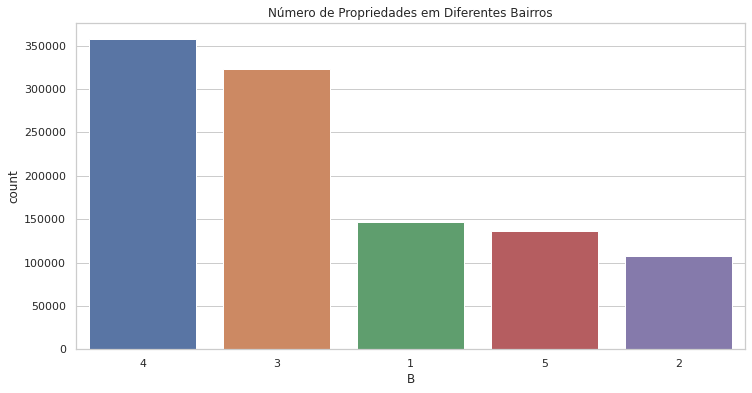

In [20]:
# Visualização da variável 2
sns.set_theme(style = 'whitegrid')
plt.figure(figsize = (12, 6))
fig1 = sns.countplot(x = 'B', data = dados, order = dados['B'].value_counts().index)
plt.title("Número de Propriedades em Diferentes Bairros")

**Variável 3** \
Nome da Variável: BLOCK \
Descrição: Número de até 5 dígitos que representam códigos de bloco em diferentes bairros

In [21]:
# Contagem
BLOCK = df_cat['BLOCK'].value_counts().rename_axis('Unique_values_BLOCK').reset_index(name = 'Counts')
BLOCK[:15]

,Unique_values_BLOCK,Counts
0,3944,3888
1,16,3786
2,3943,3424
3,3938,2794
4,1171,2535
5,3937,2275
6,1833,1774
7,2450,1651
8,1047,1480
9,7279,1302


**Variável 4** \
Nome da Variável: LOT \
Descrição: Número de até 4 dígitos que representam códigos de lote em diferentes Borough & Block

In [22]:
# Contagem
LOT = df_cat['LOT'].value_counts().rename_axis('Unique_values_LOT').reset_index(name = 'Counts')[:15]
LOT[:15]

,Unique_values_LOT,Counts
0,1,24367
1,20,12294
2,15,12171
3,12,12143
4,14,12074
5,16,12042
6,17,11982
7,18,11979
8,25,11949
9,21,11840


**Variável 5** \
Nome da Variável: EASEMENT  \
Descrição: Tipos de easement

Text(0.5, 1.0, 'Quantidade de Imóveis com Diversos Tipos de Easement')

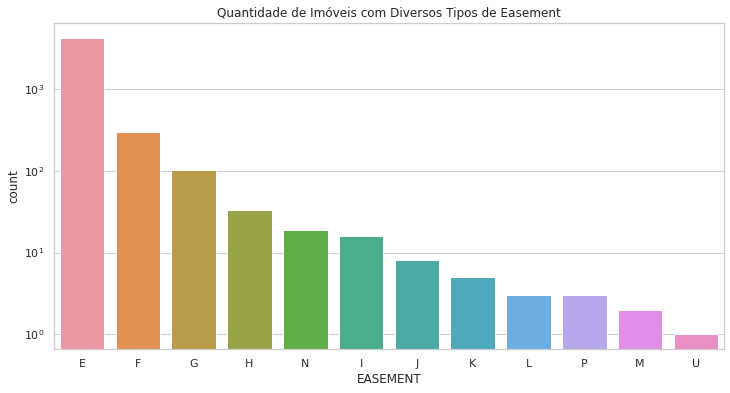

In [23]:
# Visualização da variável 5
sns.set_theme(style = 'whitegrid')
plt.figure(figsize = (12, 6))
fig2 = sns.countplot(x = 'EASEMENT', data = dados, order = dados['EASEMENT'].value_counts().index)
fig2.set_yscale("log")
fig2.set_title('Quantidade de Imóveis com Diversos Tipos de Easement')

**Variável 6** \
Nome da Variável: OWNER \
Descrição: Proprietários dos imóveis

In [24]:
# Contagem
OWNER = df_cat['OWNER'].value_counts().rename_axis('Unique_values_OWNER').reset_index(name = 'Counts')

In [25]:
OWNER.head()

,Unique_values_OWNER,Counts
0,PARKCHESTER PRESERVAT,6020
1,PARKS AND RECREATION,4255
2,DCAS,2169
3,HOUSING PRESERVATION,1904
4,CITY OF NEW YORK,1450


In [26]:
OWNER.tail()

,Unique_values_OWNER,Counts
863341,ELARIO ALTERNO,1
863342,"CHARLES,VIRGINIA",1
863343,"HAYLES, HEATHER",1
863344,GLENDORA HARVEY,1
863345,EDWARD DONOHUE,1


**Variável 7** \
Nome da Variável: BLDGCL \
Descrição: Classe do imóvel

In [27]:
# Contagem
BLDGCL = df_cat['BLDGCL'].value_counts().rename_axis('Unique_values_BLDCGL').reset_index(name = 'Counts')

In [28]:
BLDGCL.tail()

,Unique_values_BLDCGL,Counts
195,I2,4
196,I3,4
197,H7,3
198,E6,1
199,Y5,1


In [29]:
BLDGCL.head()

,Unique_values_BLDCGL,Counts
0,R4,139879
1,A1,123369
2,A5,96984
3,B1,84208
4,B2,77598


**Variável 8** \
Nome da Variável: TAXCLASS \
Descrição: Código de classe de imposto de propriedade

Text(0.5, 1.0, 'Número de Propriedades com Vários Tipos de Classe')

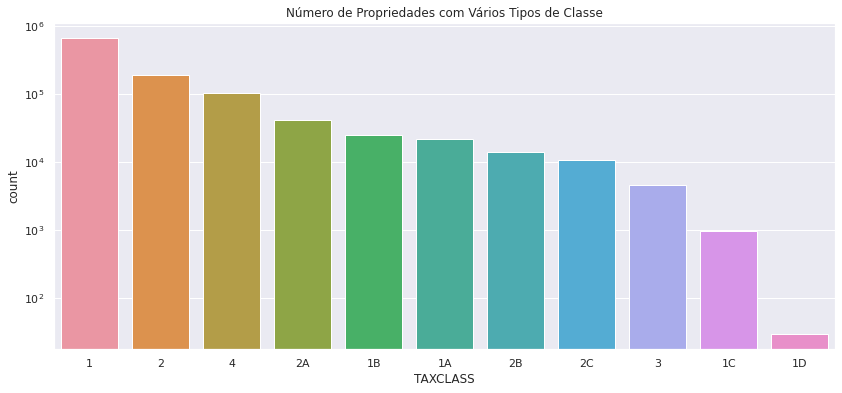

In [30]:
# Visualização da variável 8
sns.set_theme(style = 'darkgrid')
plt.figure(figsize = (14, 6))
fig3 = sns.countplot(x = 'TAXCLASS', data = dados, order = dados['TAXCLASS'].value_counts().index)
fig3.set_yscale("log")
fig3.set_title('Número de Propriedades com Vários Tipos de Classe')

**Variável 9** \
Nome da Variável: LTFRONT \
Descrição: Frente do lote em pés (feet)

In [31]:
# Divide em percentis
dados['LTFRONT'].describe(percentiles = [0.5,0.75,0.995])

count   1070994.00
mean         36.64
std          74.03
min           0.00
50%          25.00
75%          40.00
99.5%       375.00
max        9999.00
Name: LTFRONT, dtype: float64

In [32]:
# Filtra por valores iguais ou menores que 375
tmp = dados[dados['LTFRONT'] <= 375]

Text(0.5, 1.0, 'Distribuição da Variável LTFRONT')

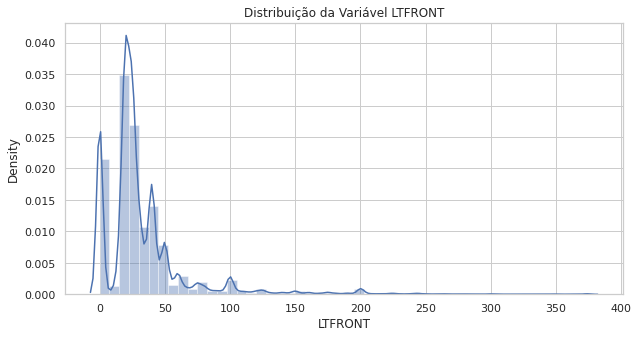

In [33]:
# Visualização da variável 9
sns.set_theme(style = 'whitegrid')
plt.figure(figsize = (10, 5))
fig4 = sns.distplot(tmp.LTFRONT, bins = 50)
fig4.set_title('Distribuição da Variável LTFRONT')

**Variável 10** \
Nome da Variável: LTDEPTH \
Descrição: Profundidade do lote em pés (feet)

In [34]:
# Divide em percentis
dados['LTDEPTH'].describe(percentiles = [0.18,0.25,0.4,0.83,0.98,0.9995])

count    1070994.00
mean          88.86
std           76.40
min            0.00
18%           49.00
25%           80.00
40%          100.00
50%          100.00
83%          101.00
98%          200.00
99.95%      1056.50
max         9999.00
Name: LTDEPTH, dtype: float64

In [35]:
# Filtra por valores iguais ou menores que 425
tmp = dados[dados['LTDEPTH'] <= 425]

Text(0.5, 1.0, 'Distribuição da Variável LTDEPTH')

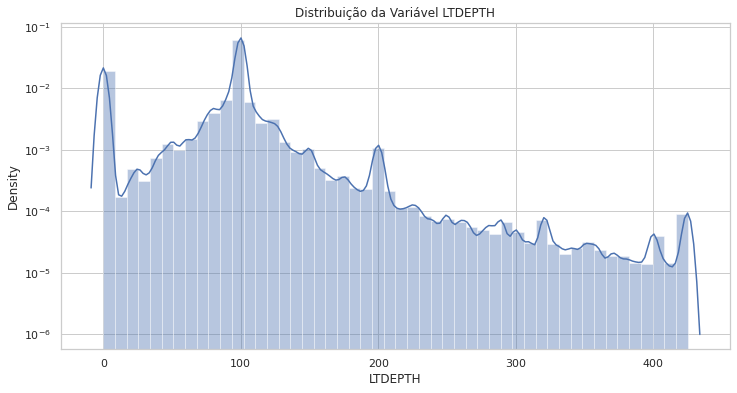

In [36]:
# Visualização da variável 10
sns.set_theme(style = 'whitegrid')
plt.figure(figsize = (12, 6))
fig5 = sns.distplot(tmp.LTDEPTH, bins = 50)
fig5.set_yscale("log")
fig5.set_title('Distribuição da Variável LTDEPTH')

**Variável 11** \
Nome da Variável: EXT \
Descrição: E- Extension, G- Garage, EG- Extension e Garage 

Text(0.5, 1.0, 'Número de Propriedades com Vários Tipos de Extensões / Garagem')

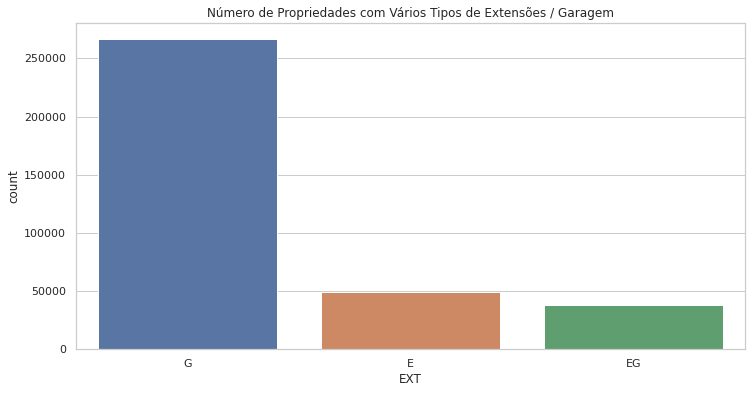

In [37]:
# Visualização da variável 11
sns.set_theme(style = 'whitegrid')
plt.figure(figsize = (12, 6))
fig6 = sns.countplot(x = 'EXT', data = dados, order = dados['EXT'].value_counts().index)
fig6.set_title('Número de Propriedades com Vários Tipos de Extensões / Garagem')

**Variável 12**  \
Nome da Variável: STORIES \
Descrição: Número de andares do edifício

In [38]:
# Divide em percentis
dados['STORIES'].describe(percentiles = [0.5,0.75,0.995])

count   1014730.00
mean          5.01
std           8.37
min           1.00
50%           2.00
75%           3.00
99.5%        50.00
max         119.00
Name: STORIES, dtype: float64

In [39]:
# Filtra 
tmp = dados[dados['STORIES'] <= 50]

Text(0.5, 1.0, 'Distribuição de Andares das Propriedades')

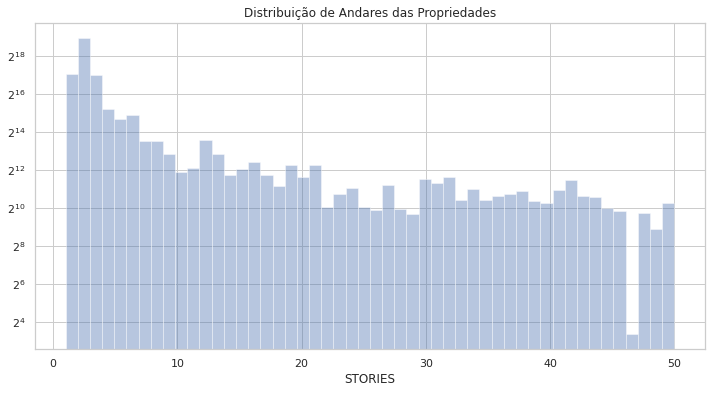

In [40]:
# Visualização da variável 12
sns.set_theme(style = 'whitegrid')
plt.figure(figsize = (12, 6))
fig7 = sns.distplot(tmp['STORIES'], kde = False, bins = 50)
fig7.set_yscale('log', basey = 2)
fig7.set_title('Distribuição de Andares das Propriedades')

**Variável 13** \
Nome da Variável: FULLVAL \
Descrição: Valor de Mercado Total

In [41]:
# Divide em percentis
dados['FULLVAL'].describe(percentiles = [0.5,0.75,0.95])

count      1070994.00
mean        874264.51
std       11582430.99
min              0.00
50%         447000.00
75%         619000.00
95%        1530000.00
max     6150000000.00
Name: FULLVAL, dtype: float64

In [42]:
# Visualiza os dados
dados['FULLVAL'].head()

RECORD
1    21400000.00
2   193800000.00
3   104686000.00
4    39200000.00
5   272300000.00
Name: FULLVAL, dtype: float64

In [43]:
# Filtra os dados para simplificar a visualização e evitar valores extremos
tmp = dados[dados['FULLVAL'] <= 3000000]

Text(0.5, 1.0, 'Distribuição do Valor de Mercado Total das Propriedades')

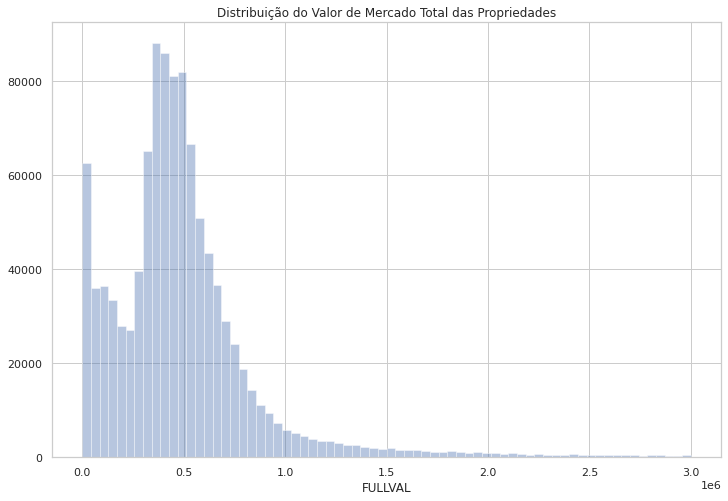

In [44]:
# Visualização da variável 13
dimensoes = (12, 8)
fig, ax = pyplot.subplots(figsize = dimensoes)
fig8 = sns.distplot(tmp.FULLVAL, kde = False, bins = 70)
fig8.set_title('Distribuição do Valor de Mercado Total das Propriedades')

**Variável 14** \
Nome da Variável: AVLAND \
Descrição: Valor de mercado do terreno

In [45]:
# Divide em percentis
dados['AVLAND'].describe(percentiles = [0.5,0.75,0.95])

count      1070994.00
mean         85067.92
std        4057260.06
min              0.00
50%          13678.00
75%          19740.00
95%         131388.75
max     2668500000.00
Name: AVLAND, dtype: float64

In [46]:
# Filtra os dados
tmp = dados[dados['AVLAND'] <= 50000]

Text(0.5, 1.0, 'Distribuição do Valor de Mercado do Terreno das Propriedades')

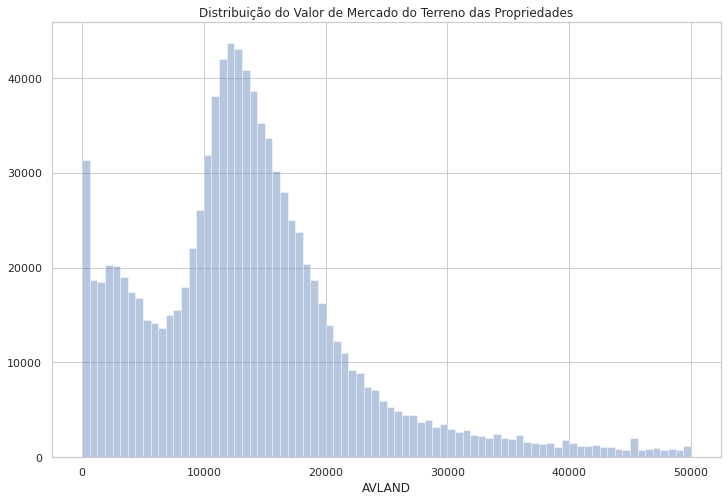

In [47]:
# Visualização da variável 14
dimensoes = (12, 8)
fig, ax = pyplot.subplots(figsize = dimensoes)
fig9 = sns.distplot(tmp.AVLAND, kde = False, bins = 80)
fig9.set_title('Distribuição do Valor de Mercado do Terreno das Propriedades')

**Variável 15** \
Nome da Variável: EXLAND \
Descrição: Valor provisório do terreno com isenção temporária

In [49]:
# Divide em percentis
dados['EXLAND'].describe(percentiles = [0.5,0.75,0.95])

count      1070994.00
mean         36423.89
std        3981575.79
min              0.00
50%           1620.00
75%           1620.00
95%          14489.00
max     2668500000.00
Name: EXLAND, dtype: float64

In [50]:
# Filtro
tmp = dados[dados['EXLAND'] <= 20000]

Text(0.5, 1.0, 'Valor Provisório do Terreno com Isenção Temporária')

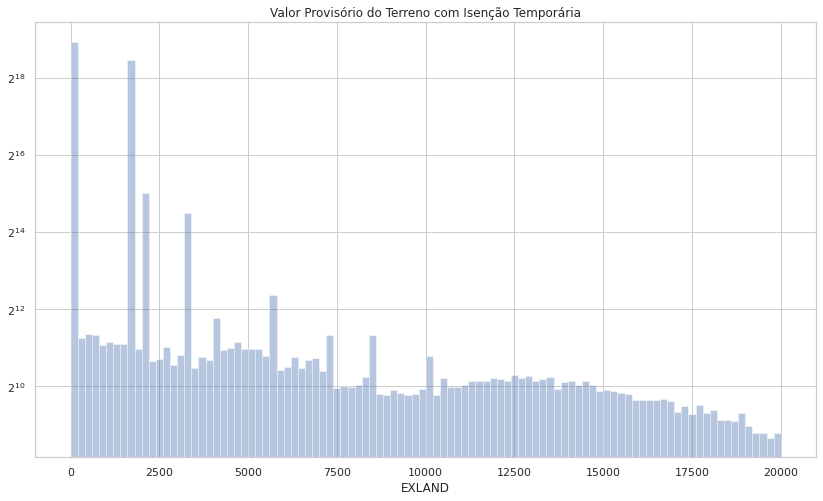

In [51]:
# Visualização da variável 15
dimensoes = (14, 8)
fig, ax = pyplot.subplots(figsize = dimensoes)
fig11 = sns.distplot(tmp.EXLAND, kde = False, bins = 100)
fig11.set_yscale('log', basey = 2)
fig11.set_title('Valor Provisório do Terreno com Isenção Temporária')

# Fim